In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
ccba = pd.read_csv('/home/bill/moneylaundring/dataset/public_train_x_ccba_full_hashed.csv')
cdtx = pd.read_csv('/home/bill/moneylaundring/dataset/public_train_x_cdtx0001_full_hashed.csv')
custinfo = pd.read_csv('/home/bill/moneylaundring/dataset/public_train_x_custinfo_full_hashed.csv')
dp = pd.read_csv('/home/bill/moneylaundring/dataset/public_train_x_dp_full_hashed.csv')
remit = pd.read_csv('/home/bill/moneylaundring/dataset/public_train_x_remit1_full_hashed.csv')
p_date = pd.read_csv('/home/bill/moneylaundring/dataset/public_x_alert_date.csv')
t_date = pd.read_csv('/home/bill/moneylaundring/dataset/train_x_alert_date.csv')
answer = pd.read_csv('/home/bill/moneylaundring/dataset/train_y_answer.csv')

In [3]:
custinfo

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE
0,352249,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1465816.0,7
1,352253,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,98177.0,2
2,352254,e5b0002791c7852644a2730abeaa893cdf14a072ef7812...,1,19.0,2052922.0,7
3,352280,74214c478dc6519fbefe4bc31693865bdcd698ab974b64...,3,15.0,201906.0,5
4,352282,0340e7611f0d82c3cb87e6194fa14bb2ccf8afbf1b3418...,1,12.0,7450.0,5
...,...,...,...,...,...,...
25746,352123,b600c0720096c241f5aec16b096c6a353492eee8a5855a...,1,17.0,12207.0,2
25747,352124,06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...,1,17.0,259985.0,4
25748,352125,0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...,3,19.0,928963.0,3
25749,352128,ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42...,3,19.0,21647.0,4


In [3]:
cinfo = pd.merge(custinfo, t_date, on='alert_key')
cinfo = pd.merge(cinfo, answer, on='alert_key')
cinfo

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE,date,sar_flag
0,171142,a39fea9aec90969fe66a2b2b4d1b86368a2d38e8b8d4bf...,3,12.0,241719.0,3,0,0
1,171152,7e42b5dca9b28ee8e5545beb834361e90e6197d176b389...,3,13.0,599497.0,6,0,0
2,171177,a6cdf6302aead77112013168c6d546d2df3bcb551956d2...,1,19.0,51160.0,4,0,0
3,171178,1a3efa69705f611c7ef2384a715c8142e2ee801cfec9df...,3,9.0,3634343.0,6,0,0
4,171180,67f8cbb64dd3d447e992b1b299e0ceed3372188e47c88e...,1,17.0,4076287.0,4,0,0
...,...,...,...,...,...,...,...,...
23901,352123,b600c0720096c241f5aec16b096c6a353492eee8a5855a...,1,17.0,12207.0,2,364,0
23902,352124,06c5ea5ccda4dfd8839c0dec8646fb3071d2c02883ef8a...,1,17.0,259985.0,4,364,0
23903,352125,0c2dc5fedc3689abf5ff4be14fe8fea8d23d22068297c2...,3,19.0,928963.0,3,364,0
23904,352128,ffe5f2bd86ecfd7d0a0f4c4b76dd5c312649be95eb8b42...,3,19.0,21647.0,4,364,0


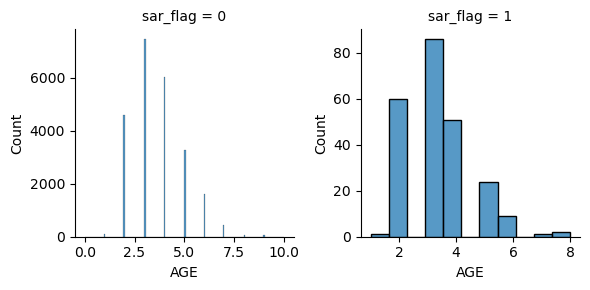

In [20]:
c_age = sns.FacetGrid(cinfo, col='sar_flag',sharey=False, sharex=False)
c_age.map(sns.histplot, 'AGE')

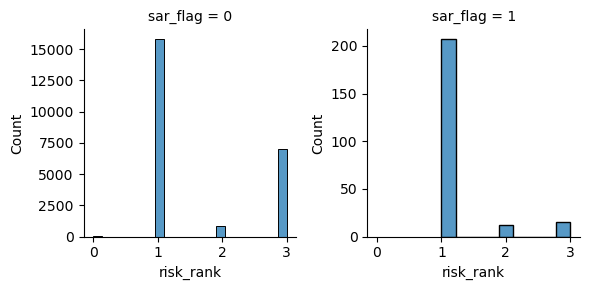

In [23]:
c_risk = sns.FacetGrid(cinfo, col='sar_flag', sharey=False)
c_risk.map(sns.histplot, 'risk_rank')

In [8]:
new_ccba = pd.merge(cinfo, ccba, on='cust_id')

In [13]:
new_ccba['cust_id'][new_ccba['sar_flag']==1]

7540      deea7839000d9f8c1e3fed53e0a1141266fb8d7149a050...
7541      deea7839000d9f8c1e3fed53e0a1141266fb8d7149a050...
7542      deea7839000d9f8c1e3fed53e0a1141266fb8d7149a050...
7543      deea7839000d9f8c1e3fed53e0a1141266fb8d7149a050...
7544      deea7839000d9f8c1e3fed53e0a1141266fb8d7149a050...
                                ...                        
199753    2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...
199754    2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...
199755    2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...
199756    2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...
199757    2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...
Name: cust_id, Length: 1789, dtype: object

In [34]:
cinfo['total_asset'].value_counts()

0.0          3014
101.0         145
303.0          83
104.0          76
8848.0         72
             ... 
3572336.0       1
1098129.0       1
199600.0        1
998743.0        1
3218731.0       1
Name: total_asset, Length: 7503, dtype: int64

<AxesSubplot: xlabel='total_asset', ylabel='Count'>

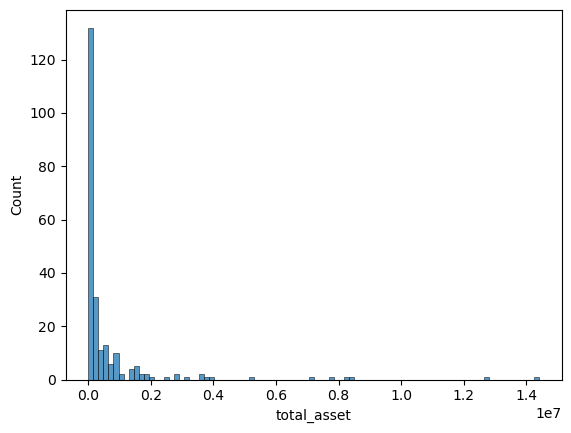

In [4]:
sns.histplot(cinfo['total_asset'][cinfo['sar_flag']==1])

<AxesSubplot: xlabel='risk_rank', ylabel='Count'>

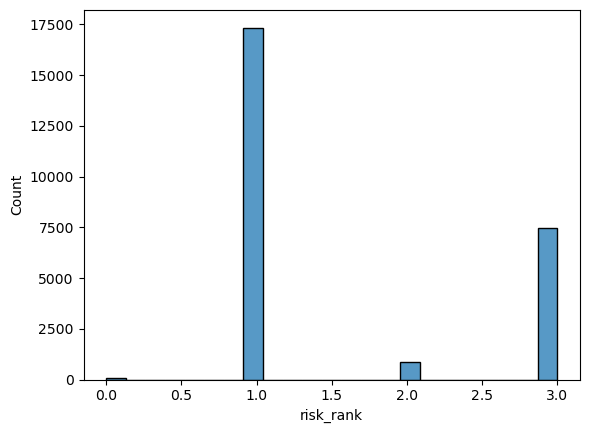

In [6]:
sns.histplot(custinfo['risk_rank'])

In [9]:
sar = answer[answer['sar_flag']==1]

In [10]:
sar

,alert_key,sar_flag
44,171770,1
136,172480,1
448,174298,1
1609,177960,1
1611,177788,1
...,...,...
23164,346021,1
23308,347051,1
23368,347894,1
23572,348724,1


In [11]:
cinfo = pd.merge(sar, custinfo, on='alert_key',how='left')

In [13]:
cinfo['risk_rank'].value_counts()

1    207
3     15
2     12
Name: risk_rank, dtype: int64

In [15]:
ccba_cinfo = cinfo.merge(ccba, on='cust_id',how='inner')

In [24]:
ccba_cinfo.to_csv('/home/bill/moneylaundring/contest/processed_dataset/ccba_cinfo.csv')

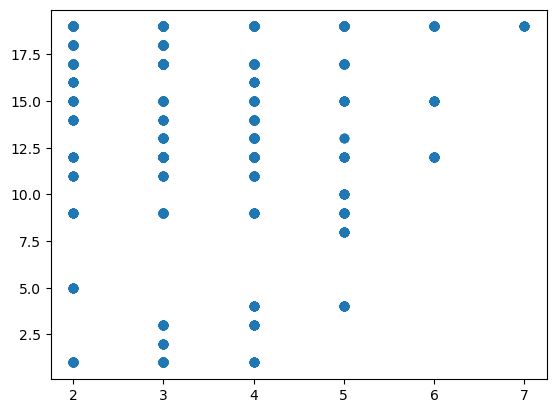

In [23]:
plt.scatter(ccba_cinfo['AGE'],ccba_cinfo['occupation_code'])

In [25]:
cdtx_cinfo = cinfo.merge(cdtx, on='cust_id', how='inner')

In [35]:
dp_cinfo = cinfo.merge(dp, on='cust_id', how='inner')

In [36]:
dp_cinfo

,alert_key,sar_flag,cust_id,risk_rank,occupation_code,total_asset,AGE,debit_credit,tx_date,tx_time,tx_type,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM
0,171770,1,25cf26d9c40bb9f71292b809c4f92018b9bdfe3529c510...,1,17.0,1913895.0,4,DB,246,15,2,229640.0,1.0,13,2.0,363.0,1,1
1,171770,1,25cf26d9c40bb9f71292b809c4f92018b9bdfe3529c510...,1,17.0,1913895.0,4,CR,223,12,2,295589.0,1.0,13,4.0,307.0,1,1
2,171770,1,25cf26d9c40bb9f71292b809c4f92018b9bdfe3529c510...,1,17.0,1913895.0,4,DB,242,1,2,1045550.0,1.0,16,NaN,NaN,0,0
3,171770,1,25cf26d9c40bb9f71292b809c4f92018b9bdfe3529c510...,1,17.0,1913895.0,4,CR,246,15,2,55264.0,1.0,13,4.0,307.0,1,1
4,171770,1,25cf26d9c40bb9f71292b809c4f92018b9bdfe3529c510...,1,17.0,1913895.0,4,DB,246,15,2,226296.0,1.0,13,2.0,363.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251025,351367,1,3e2ddbf33f8b830778b39661a2ff547bee79a635b219e6...,1,17.0,141155.0,2,CR,291,0,3,257096.0,1.0,16,NaN,NaN,0,0
251026,351367,1,3e2ddbf33f8b830778b39661a2ff547bee79a635b219e6...,1,17.0,141155.0,2,CR,272,1,3,4133498.0,1.0,16,NaN,NaN,0,0
251027,351367,1,3e2ddbf33f8b830778b39661a2ff547bee79a635b219e6...,1,17.0,141155.0,2,CR,267,1,3,2822915.0,1.0,16,NaN,NaN,0,0
251028,351367,1,3e2ddbf33f8b830778b39661a2ff547bee79a635b219e6...,1,17.0,141155.0,2,CR,270,16,2,160.0,1.0,13,4.0,313.0,1,1


In [26]:
cdtx_cinfo

,alert_key,sar_flag,cust_id,risk_rank,occupation_code,total_asset,AGE,date,country,cur_type,amt
0,171770,1,25cf26d9c40bb9f71292b809c4f92018b9bdfe3529c510...,1,17.0,1913895.0,4,13,130,47,814.0
1,171770,1,25cf26d9c40bb9f71292b809c4f92018b9bdfe3529c510...,1,17.0,1913895.0,4,20,130,47,1334.0
2,171770,1,25cf26d9c40bb9f71292b809c4f92018b9bdfe3529c510...,1,17.0,1913895.0,4,22,130,47,15280.0
3,171770,1,25cf26d9c40bb9f71292b809c4f92018b9bdfe3529c510...,1,17.0,1913895.0,4,22,130,47,4075.0
4,171770,1,25cf26d9c40bb9f71292b809c4f92018b9bdfe3529c510...,1,17.0,1913895.0,4,21,134,47,662.0
...,...,...,...,...,...,...,...,...,...,...,...
184188,348724,1,2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...,1,19.0,2439013.0,2,295,130,47,1238.0
184189,348724,1,2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...,1,19.0,2439013.0,2,315,130,47,2942.0
184190,348724,1,2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...,1,19.0,2439013.0,2,353,130,47,1317.0
184191,348724,1,2f4011af820fb0a91313221c6cc2b649495a5cb05aed82...,1,19.0,2439013.0,2,355,135,46,1496.0


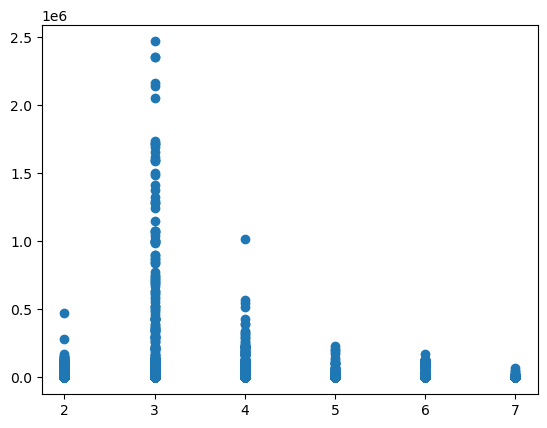

In [32]:
plt.scatter(cdtx_cinfo['AGE'],cdtx_cinfo['amt'])

,cust_id,lupay,byymm,cycam,usgam,clamt,csamt,inamt,cucsm,cucah
0,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,0,152628.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,30,152628.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,61,152628.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,91,152628.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0172056578071e83399216fcd640bdc4de4583149d0fd9...,0.0,122,152628.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
59070,ffeb846f2294ec4397f800736dc1e14eb754da5425398d...,0.0,244,781570.0,63952.0,0.0,0.0,0.0,61927.0,0.0
59071,ffeb846f2294ec4397f800736dc1e14eb754da5425398d...,61927.0,275,781570.0,37297.0,0.0,0.0,0.0,37276.0,0.0
59072,ffeb846f2294ec4397f800736dc1e14eb754da5425398d...,37297.0,306,781570.0,45413.0,0.0,0.0,0.0,19766.0,0.0
59073,ffeb846f2294ec4397f800736dc1e14eb754da5425398d...,19766.0,334,781570.0,26360.0,0.0,0.0,1142.0,2568.0,0.0
